# Geodatenanalyse 1

## Übung 7: Grundlagen der Sensitivitätsanalyse - Lösung

### Contribution-to-Variance



Als Anwendungsbeispiel für eine Sensitivitätsanalyse werden wir das Model und die Unsicherheitsanalyse aus der letzten Übung verwenden. Kopiert daher zuerst das Skript mit der MC Simulation in dieses Notebook, damit ihr alle Input- und Outputwerte als Variablen zur Verfügung habt. 

In [2]:
# [1]
# Monte-Carlo Simulation zur Bestimmung der Abbaurate von O-Xylol
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

n = 5000 # number of MC simulations 

# input data 
# isotope shift delta 13C [o/oo], truncated to (3.8, 4.8)
a, b = (3.8 - 4.3) / 0.7, (4.8 - 4.3) / 0.7
deltaC = truncnorm.rvs(a, b, 4.3, 0.7, size=n)
# isotope enrichment factor epsilon [-]
epsilon = np.random.uniform(-3.2, -1.1, n)
# distance [m]
s = np.random.uniform(415, 423, n)
# effective porosity [-], trunctaed to (0.12, 0.30)
a, b = (0.12 - 0.21) / 0.9, (0.3 - 0.21) / 0.9
neff = truncnorm.rvs(a, b, 0.21, 0.9, size=n)
# time, truncated to (3e8, 3.3e8)
a, b = (3e8 - 3.15e8) / 1.6e6, (3.3e8 - 3.15e8) / 1.6e6
t = truncnorm.rvs(a, b, 3.15e8, 1.6e6, size=n)
# hydraulic gradient [-]
grad = np.random.uniform(1.3e-3, 1.6e-3, n)

kf =np.zeros(n)
lambda_rate = np.zeros(n)
# analytical model
for i in range(n):
    kf[i] = (s[i]*neff[i])/(t[i]*grad[i])
    lambda_rate[i] = -(deltaC[i]*kf[i]*grad[i])/(epsilon[i]*s[i]*neff[i])

lambda_rate = lambda_rate*3600*24*365 # to get values as [1/a]

Für die Contribution-to-Variance Analyse und die Berechnung von Kovarianzen und Korrelationen ist es praktisch, alle benötigten Werte in einem Pandas DataFrame zusammenzufassen, um sicherzustellen, dass die Dimensionen, Ausrichtung von Spalten usw. alle stimmen. 

Das Generieren eines DataFrame erfolgt über die Funktion `pandas.DataFrame()`, mit dem Syntax: "data = pd.DataFrame({'column_name': column_value, ...})". Die Spalten und Namen könnt Ihr aus dem Output des Monte Carlo Codes zusammensetzen. 

Berechnet anschließend die Kovarianzen (`data.cov()`) und Korrelationen nach Pearson (`data.corr()`) für den DataFrame. Welches Maß macht hier mehr Sinn für eine Betrachtung der Sensitivitäten? 

In [3]:
# [2] 
# pandas package importieren
import pandas as pd

# DataFrame generieren
data = pd.DataFrame({'lambda_rate': lambda_rate, 'kf': kf, 'deltaC': deltaC, 'epsilon': epsilon, 's':s,
                     'neff': neff, 't': t, 'grad': grad})

# Kovarianzen und Korrelation berechnen
covariance = data.cov()
correlation = data.corr()

Stellt nun die Ergebnisse für die Sensitivitätsanalyse, sowohl für den kf-Wert als auch die Abbaurate mit Hilfe der Funktion `subplot` in `matplotlib` graphisch in einem Tornadoplot dar. Am einfachsten geht das über ein horizontales Blaknediagramm mit `matplotlib.pyplot.barh()`. 

Überlegt Euch auch genau welche Werte aus der Korrelations-, bzw- Kovarianzmatrix, in dem Plot dargestellt werden sollen, 

Fügt in der Abbildung schließlichen auch einen Titel (`title()`) und Achsenbeschrfitungen (`labels()`) ein.  


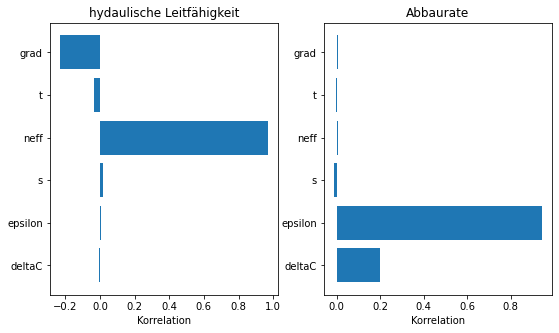

In [4]:
# [3] 
import matplotlib.pyplot as plt

labels = ['deltaC', 'epsilon', 's', 'neff', 't', 'grad']
plot_bio = correlation.iloc[0,2:len(correlation)].to_numpy()
plot_kf = correlation.iloc[1,2:len(correlation)].to_numpy()

fig = plt.figure(1, figsize=(9, 5))

ax = fig.add_subplot(1,2,1)
plt.barh(labels, width=plot_kf)
plt.xlabel('Korrelation')
plt.title ('hydaulische Leitfähigkeit')

ax1 = fig.add_subplot(1,2,2)
plt.barh(labels, width=plot_bio)
plt.xlabel('Korrelation')
plt.title ('Abbaurate')
plt.show()


## Ende

### Referenzen: 

Würth et al. (2021): Quantifying biodegradation rate constants of o-xylene by combining compound-specific isotope analysis and groundwater dating. Journal of Contaminant Hydrology, 238, 103757